In [8]:
!nvidia-smi

Wed Mar 10 16:11:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.models import Model
from keras.layers import ReLU,Softmax,Lambda,Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet152V2
from keras.losses import CategoricalCrossentropy
from glob import glob  
import matplotlib.pyplot as plt
import numpy as np

In [28]:
image_size=[224,224]

train_image="../input/tomato/null"
test_imaage="../input/tomato/null"

In [29]:
# include_top=False removes the fully connected layer
resnet=ResNet152V2(input_shape=image_size+[3],weights='imagenet',include_top=False)

234553344/234545216 [==============================] - 2s 0us/step


In [30]:
## dont train with existing weights
for layers in inception.layers:
  layers.trainable=False

In [31]:
## number of output features
output_no=glob('../input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [32]:
## flatten layer connected to the output of inception
x=Flatten()(inception.output)
## output layer connected to the flatten layer
prediction=Dense(len(output_no),activation='softmax')(x)

In [33]:
model=Model(inputs=inception.input,outputs=prediction)

In [34]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [35]:
model.compile(loss=CategoricalCrossentropy(),optimizer='adam',metrics='accuracy')

In [36]:
## data augumnetation
train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [39]:
train_data=train_datagen.flow_from_directory('../input/tomato/New Plant Diseases Dataset(Augmented)/train',target_size=[224,224],batch_size=16)

test_data=test_datagen.flow_from_directory('../input/tomato/New Plant Diseases Dataset(Augmented)/valid',target_size=[224,224],batch_size=16)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [40]:
fit=model.fit(train_data,validation_data=test_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(test_data))

Epoch 1/10
1147/1147 [==============================] - 330s 282ms/step - loss: 4.6778 - accuracy: 0.5953 - val_loss: 2.7053 - val_accuracy: 0.7952
Epoch 2/10
1147/1147 [==============================] - 226s 197ms/step - loss: 3.1836 - accuracy: 0.7886 - val_loss: 4.0589 - val_accuracy: 0.7786
Epoch 3/10
1147/1147 [==============================] - 226s 197ms/step - loss: 3.1659 - accuracy: 0.8169 - val_loss: 2.9750 - val_accuracy: 0.8277
Epoch 4/10
1147/1147 [==============================] - 227s 198ms/step - loss: 2.8386 - accuracy: 0.8448 - val_loss: 3.6683 - val_accuracy: 0.8233
Epoch 5/10
1147/1147 [==============================] - 227s 198ms/step - loss: 2.8695 - accuracy: 0.8568 - val_loss: 5.1129 - val_accuracy: 0.8092
Epoch 6/10
1147/1147 [==============================] - 226s 197ms/step - loss: 2.8847 - accuracy: 0.8604 - val_loss: 6.3494 - val_accuracy: 0.7743
Epoch 7/10
1147/1147 [==============================] - 227s 198ms/step - loss: 2.9444 - accuracy: 0.8707 - val_

In [41]:
fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

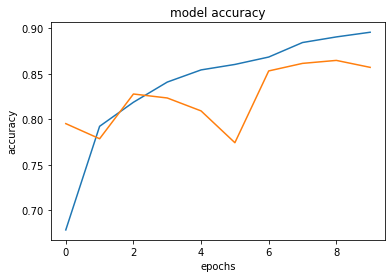

In [42]:
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])

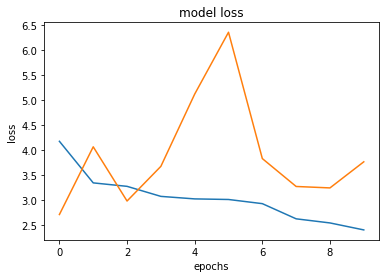

In [43]:
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])

In [ ]:
model.save('resnet152V2.h5')